# Analysing Global Protests since 1990

## Introduction
This project will explore a set of two datasets related to protest and democracy. This project aggregates information from two distinct datasets, offering a rich, multidimensional perspective on mass mobilization and socio-political conditions. It is a valuable resource for analyzing trends, identifying patterns, and exploring correlations between protests and various socio-economic and political factors.

## Description of the data sets
******
### Mass Mobilization Dataset

Focus: Tracks protest events globally, capturing information about the type of protests, their scale, and their outcomes.

Features include:
Dates and locations of protests.
Types of demands made by protesters (e.g., economic, political, social).
Government responses to protests.

### V-Dem Dataset (Varieties of Democracy)

Focus: Measures the quality and characteristics of democracy across countries.
Features include:
Indicators of democratic governance (e.g., electoral integrity, civil liberties).
Political participation and freedom of expression.
Trends in authoritarian practices.


## Importing Libraries
****
To begin, we'll start by importing our the libraries we'll likely need for this project.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Data Set 1: Mass Mobilisation
I'll now read in the first data set I want to examine, mass mobilisation. We will read this from CSV.

In [3]:
# Reading in Mass Mobilisations data set
massmob_path = "data/massmobilisation.csv"
massmob_df = pd.read_csv(massmob_path)

# Since I'm focusing on complete data, I want to remove all rows where the value in the protest column is 0.
# I also don't want to include the year 2020, since the data only goes up to the end of February, and wouldn't be an accurate depiction of the level of protest (even allowing for fewer protests due to the Covid-19 pandemic)
massmob_df = massmob_df[(massmob_df['protest'] != 0) & (massmob_df['year'] != 2020)]

print(massmob_df.head())


          id country  ccode  year         region  protest  protestnumber  \
0  201990001  Canada     20  1990  North America        1              1   
1  201990002  Canada     20  1990  North America        1              2   
2  201990003  Canada     20  1990  North America        1              3   
3  201990004  Canada     20  1990  North America        1              4   
4  201990005  Canada     20  1990  North America        1              5   

   startday  startmonth  startyear  ...  protesterdemand4   stateresponse1  \
0      15.0         1.0     1990.0  ...               NaN           ignore   
1      25.0         6.0     1990.0  ...               NaN           ignore   
2       1.0         7.0     1990.0  ...               NaN           ignore   
3      12.0         7.0     1990.0  ...               NaN     accomodation   
4      14.0         8.0     1990.0  ...               NaN  crowd dispersal   

   stateresponse2  stateresponse3 stateresponse4 stateresponse5  \
0      

## Global Protests per Year
***
The first data point I will look at is the number of protests globally per year, from 1990 to 2019.

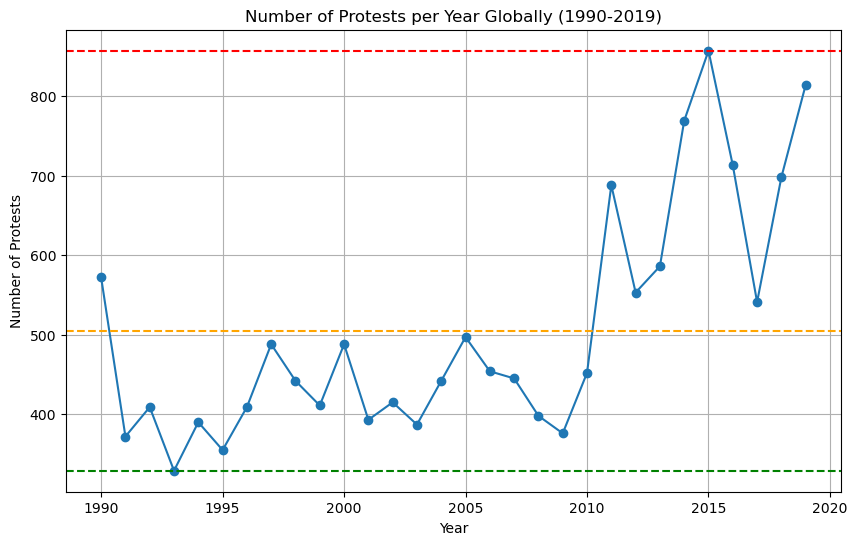

Average yearly total: 504.76666666666665


In [10]:
# Starting by grouping the data by year, and counting the number of protests for each year.
yeargrouped = massmob_df.groupby('year')
protests_per_year = yeargrouped.size().reset_index(name='num_protests')

# Also calculating average, min, and max number of protests to add to my plot
avgyearlyprotests = protests_per_year['num_protests'].mean()
minyearlyprotests = protests_per_year['num_protests'].min()
maxyearlyprotests = protests_per_year['num_protests'].max()

# Plot protests per year
plt.figure(figsize=(10, 6))
plt.plot(protests_per_year['year'], protests_per_year['num_protests'], marker='o')
plt.title('Number of Protests per Year Globally (1990-2019)')
plt.xlabel('Year')
plt.ylabel('Number of Protests')

# Add average, min, and max lines
plt.axhline(y=avgyearlyprotests, color='orange', linestyle='--', label=f'Average: {avgyearlyprotests:.2f}')
plt.axhline(y=minyearlyprotests, color='green', linestyle='--', label=f'Min: {minyearlyprotests}')
plt.axhline(y=maxyearlyprotests, color='red', linestyle='--', label=f'Max: {maxyearlyprotests}')

plt.grid()
plt.show()

print(f'Average yearly total: {avgyearlyprotests}')



As you can see from the plot above, the 90s and 00s appeared to be a relatively stable period in world sociopolitics, before an explosion of protests in the 2010s, aligning with events such as the Arab Spring movement and the increase of climate-related protests in the West. 1993 was the year of least mobilisation, with 329 protests recorded. 2015, on the other hand, could be considered the largest year of mass mobilisation in recent decades, with 857 protests recorded worldwide. The average number of yearly protests from 1990 to 2019 was 505; however, as previously mentioned, this is swayed heavily by the 2010s, with yearly numbers only hitting this total once before 2011. Interestingly, the one instance prior to 2011 where the number of protests was above average was the first year of the data, 1990, which is hardly surprising given that this year marked the breakup of the USSR and the subsequent fall of communism in Europe.

## Reasons for Protest

              protesterdemand1  num_protests
0           labor wage dispute          1704
1              land farm issue           466
2             police brutality           817
3  political behavior, process          9614
4  price increases, tax policy          1086
5        removal of politician          1004
6          social restrictions           451


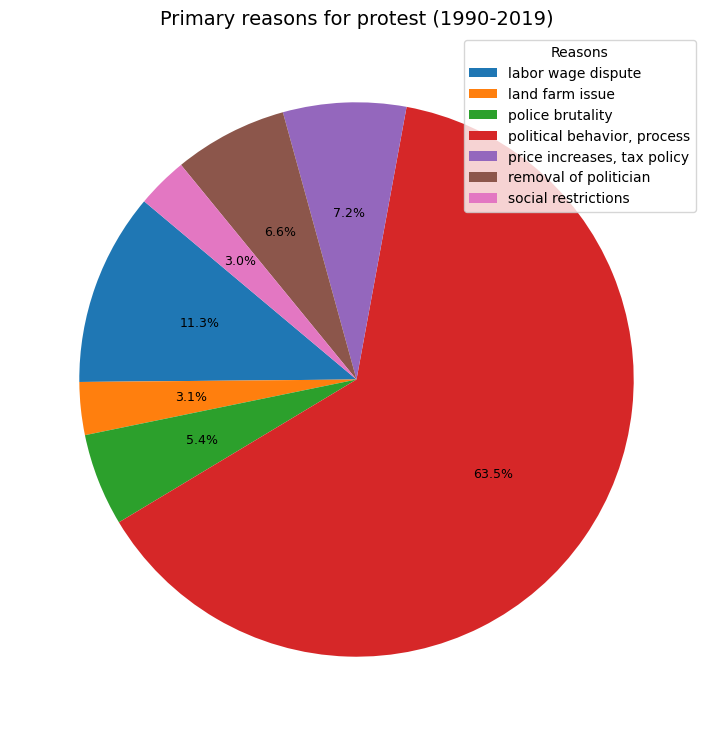

In [22]:
reasongrouped = massmob_df.groupby('protesterdemand1')
protests_by_reason = reasongrouped.size().reset_index(name='num_protests')
print(protests_by_reason)

# Plot pie chart
plt.figure(figsize=(15, 9))
wedges, texts, autotexts = plt.pie(
    protests_by_reason['num_protests'], 
    autopct='%1.1f%%',  # Display percentage with 1 decimal place
     startangle=140,
    textprops={'fontsize': 9}  # Adjust font size of labels and percentages
)
plt.title('Primary reasons for protest (1990-2019)', fontsize=14)  # Adjust title font size

# Add legend
plt.legend(wedges, protests_by_reason['protesterdemand1'], title="Reasons", fontsize=10)  # Adjust legend font size
plt.show()

Interestingly, political behavior and process has dominated the reasoning behind protests taking places in the previous 3 decades. Of the other reasons, only Labour/wage disputes reaches 10%.

## Protests per region
Now let's look at how these protests were split from a regional perspective.

            region  num_protests
0           Africa          3164
1             Asia          3099
2  Central America           451
3           Europe          4964
4             MENA          1251
5    North America           520
6          Oceania            38
7    South America          1656


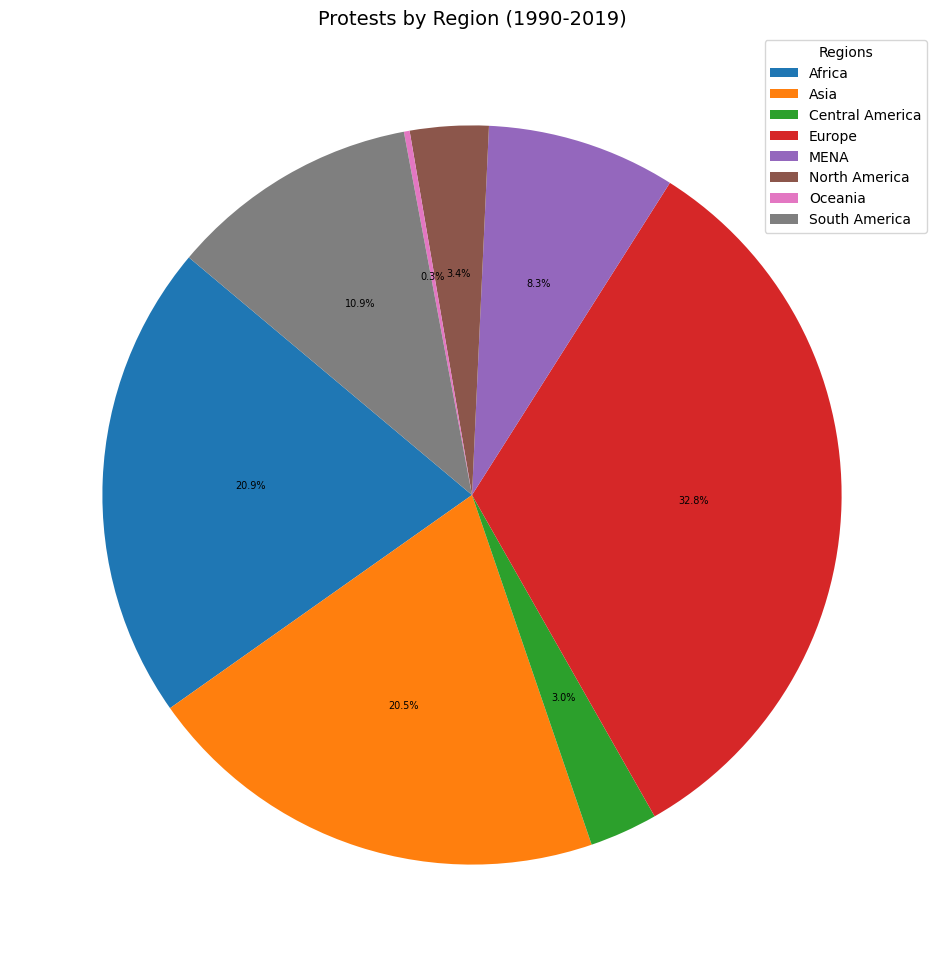

In [27]:
# Group by region and count the number of protests
regiongrouped = massmob_df.groupby('region')
protests_per_region = regiongrouped.size().reset_index(name='num_protests')
print(protests_per_region)

# Plot pie chart
plt.figure(figsize=(20, 12))
wedges, texts, autotexts = plt.pie(
    protests_per_region['num_protests'], 
    autopct='%1.1f%%',  # Display percentage with 1 decimal place
     startangle=140,
    textprops={'fontsize': 7}  # Adjust font size of labels and percentages
)
plt.title('Protests by Region (1990-2019)', fontsize=14)  # Adjust title font size

# Add legend
plt.legend(wedges, protests_per_region['region'], title="Regions", fontsize=10)  # Adjust legend font size
plt.show()




As we can see above, Europe had the highest proportion of the protests recorded in these 3 decades, followed respectively by Africa and Asia, with a sizeable proportion also in South America and MENA (Middle East & North Africa).

If we look closer at the data for Europe, we can see which countries were most mobilised. 

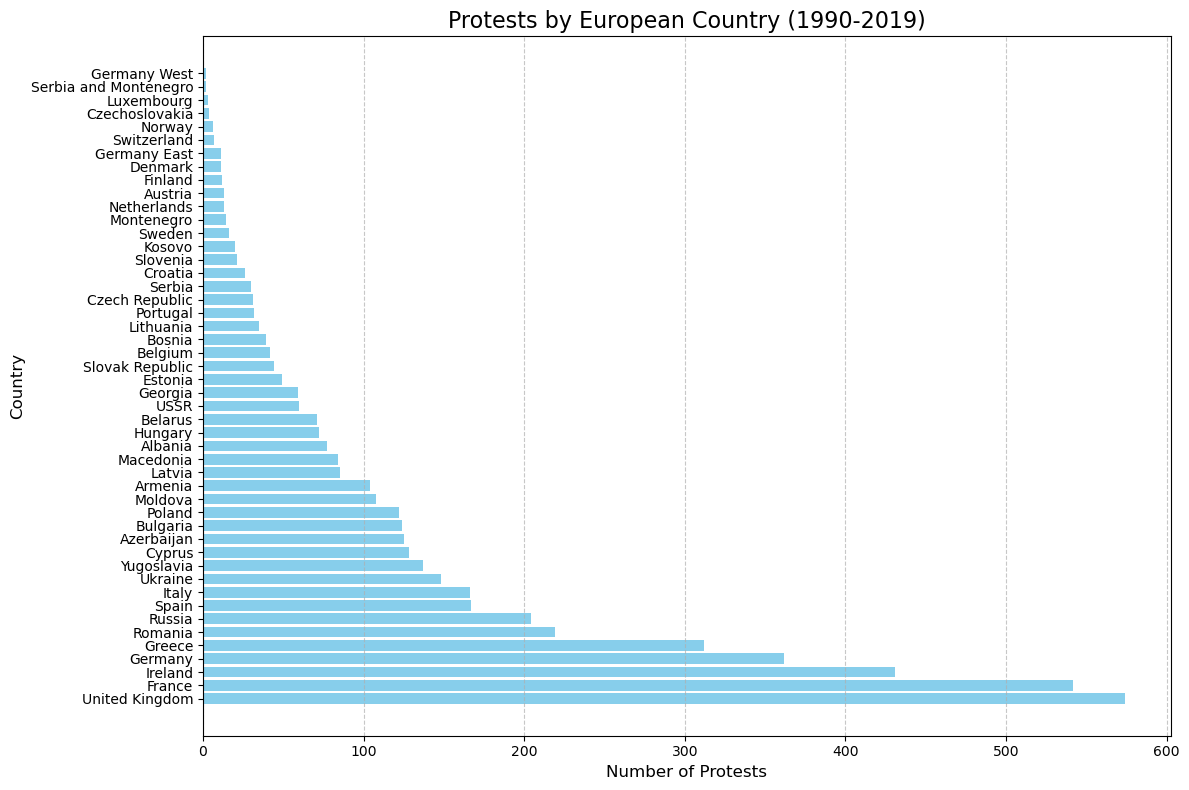

In [19]:
# To do this, I'll filter the data set for just Europe as the region and then group by country. Since the number of countries is quite large, it may be better to show this as a horizontal bar chart.
massmob_df_eu = massmob_df[(massmob_df['region'] == 'Europe')]
europegrouped = massmob_df_eu.groupby('country')
protests_per_country_eu = europegrouped.size().reset_index(name='num_protests')

# Sort the data by the number of protests for better visualization
protests_per_country_eu = protests_per_country_eu.sort_values(by='num_protests', ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 8))
plt.barh(protests_per_country_eu['country'], protests_per_country_eu['num_protests'], color='skyblue')

# Add titles and labels
plt.title('Protests by European Country (1990-2019)', fontsize=16)
plt.xlabel('Number of Protests', fontsize=12)
plt.ylabel('Country', fontsize=12)

# Add gridlines for readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Rotate y-axis labels if needed
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


There are a couple of interesting points to take from the data above.

Firstly, it's noticable that there are a number of countries here no longer in existance, such as West Germany, Czechoslovakia, USSR and Yugoslavia, to name a few. If we were to study this data in more depth, we might consider techniques like assigning the data for these countries to their successor countries. This would of course prove difficult though with countries like Yugoslavia, which subsequently split into 7 successor nations.

Secondly, you would expect the number of protests to broadly increase in line with the population of the country - this is true in the sense that United Kingdom, France, and Germany are near the top of the list. However, there are a number of outliers here, with Ireland noticeably standing out, with the 3rd highest number of protests in this period, despite a population dwarfed by the likes of Germany.


Let's now refine our analysis to look at Ireland and see if we can observe any trends.

In [34]:
massmob_ie = massmob_df[massmob_df['country'] == 'Ireland']


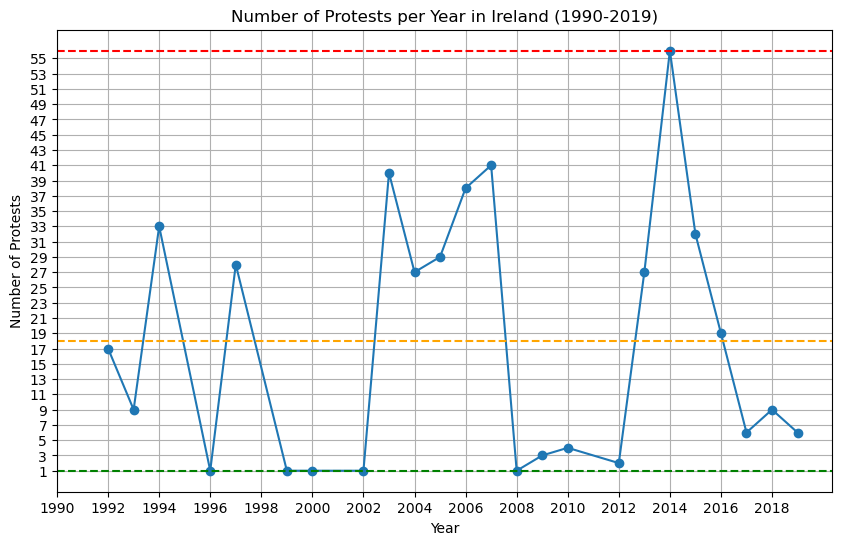

In [41]:
# Group by 'Year'
yeargrouped_ie = massmob_ie.groupby('year')

# Count the number of protests for each year
protests_per_year_ie = yeargrouped_ie.size().reset_index(name='num_protests')

# Calculate average, min, and max
avg_ie = protests_per_year_ie['num_protests'].mean()
min_ie = protests_per_year_ie['num_protests'].min()
max_ie = protests_per_year_ie['num_protests'].max()

# Plot protests per year
plt.figure(figsize=(10, 6))
plt.plot(protests_per_year_ie['year'], protests_per_year_ie['num_protests'], marker='o')
plt.title('Number of Protests per Year in Ireland (1990-2019)')
plt.xlabel('Year')
plt.ylabel('Number of Protests')

y_ticks = range(1, int(max_ie) + 1, 2)
plt.yticks(y_ticks)
x_ticks = range(1990, 2019, 2)
plt.xticks(x_ticks)

plt.axhline(y=avg_ie, color='orange', linestyle='--', label=f'Average: {average:.2f}')
plt.axhline(y=min_ie, color='green', linestyle='--', label=f'Min: {minimum}')
plt.axhline(y=max_ie, color='red', linestyle='--', label=f'Max: {maximum}')

plt.grid()
plt.show()

Looking at the data, I'm interested to know why there was such a huge spike in 2014.

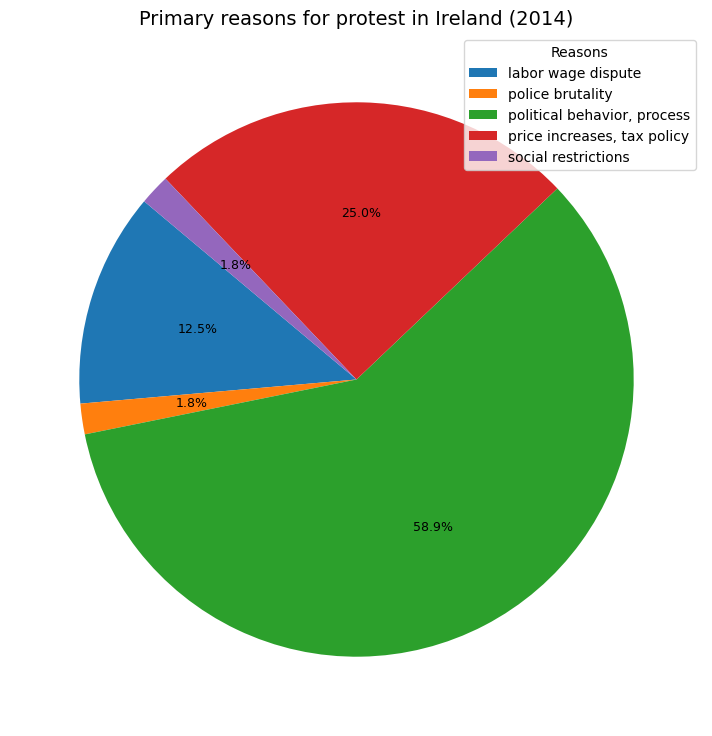

In [37]:
massmob_ie_2014 = massmob_ie[massmob_ie['year'] == 2014]

# Group by Year and Primary Demand, and count the number of protests
protestreasons_ie_2014 = massmob_ie_2014.groupby(['protesterdemand1']).size().reset_index(name='num_protests')

# Plot pie chart
plt.figure(figsize=(15, 9))
wedges, texts, autotexts = plt.pie(
    protestreasons_ie_2014['num_protests'], 
    autopct='%1.1f%%',  # Display percentage with 1 decimal place
     startangle=140,
    textprops={'fontsize': 9}  # Adjust font size of labels and percentages
)
plt.title('Primary reasons for protest in Ireland (2014)', fontsize=14)  # Adjust title font size

# Add legend
plt.legend(wedges, protestreasons_ie_2014['protesterdemand1'], title="Reasons", fontsize=10)  # Adjust legend font size
plt.show()


##  Linear Regression

Since the line plot jumps up and down, it can be difficult to measure whether the number of protests in Ireland is general increasing over time. One way to check this would be through linear regression. I want to:
a) Show if there is a general trend upwards in terms of the number of protests
b) Show the predicted number of protests for the next 10 years

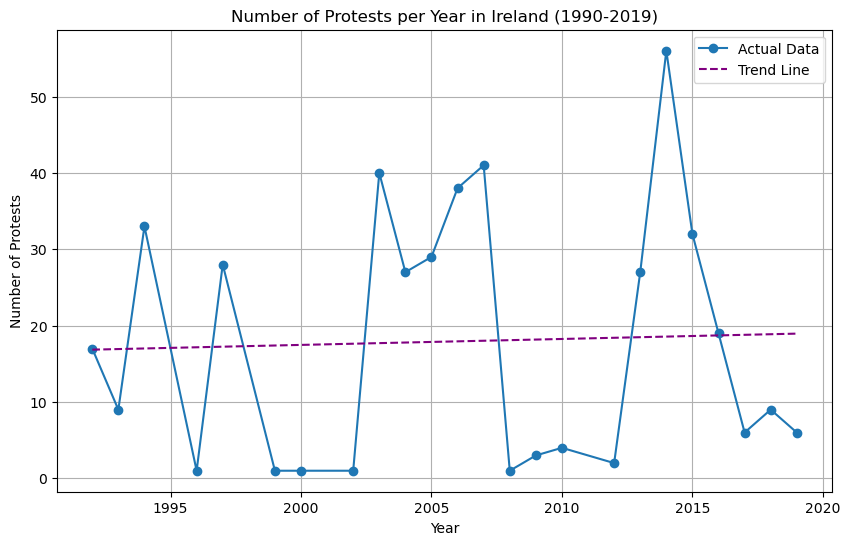

There is an upward trend with a slope of 0.08.


In [11]:
from sklearn.linear_model import LinearRegression

# Prepare data for linear regression
X = protests_per_year_ie['year'].values.reshape(-1, 1)  # Predictor (Year)
y = protests_per_year_ie['num_protests'].values  # Response (Number of Protests)

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Get the slope (trend)
slope = model.coef_[0]

# Plot protests per year with trend line
plt.figure(figsize=(10, 6))
plt.plot(protests_per_year_ie['year'], protests_per_year_ie['num_protests'], marker='o', label='Actual Data')
plt.plot(protests_per_year_ie['year'], model.predict(X), color='purple', linestyle='--', label='Trend Line')
plt.title('Number of Protests per Year in Ireland (1990-2019)')
plt.xlabel('Year')
plt.ylabel('Number of Protests')
plt.grid()
plt.legend()
plt.show()

# Display the trend
if slope > 0:
    print(f"There is an upward trend with a slope of {slope:.2f}.")
else:
    print(f"There is no upward trend (slope = {slope:.2f}).")


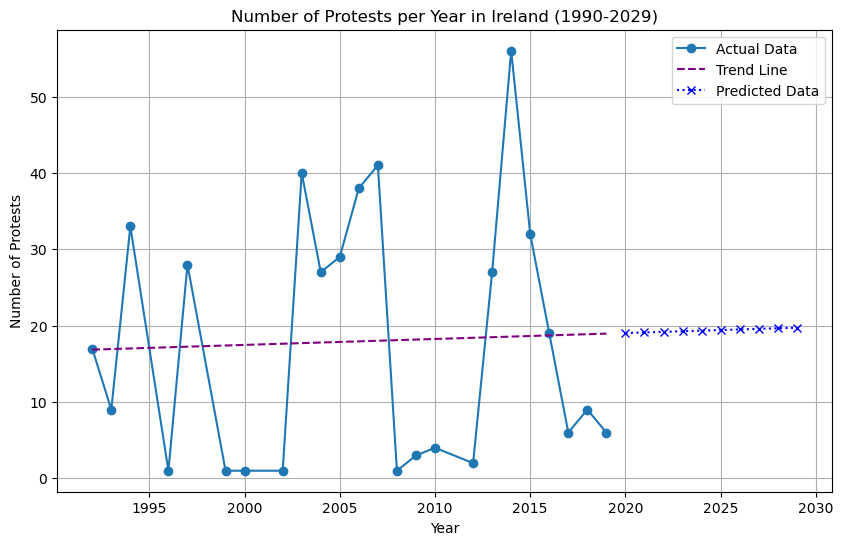

Predicted number of protests in 2020: 19.03
Predicted number of protests in 2021: 19.11
Predicted number of protests in 2022: 19.19
Predicted number of protests in 2023: 19.26
Predicted number of protests in 2024: 19.34
Predicted number of protests in 2025: 19.42
Predicted number of protests in 2026: 19.50
Predicted number of protests in 2027: 19.57
Predicted number of protests in 2028: 19.65
Predicted number of protests in 2029: 19.73


In [12]:
# Predict for the next 10 years
future_years = np.arange(2020, 2030).reshape(-1, 1)
future_protests = model.predict(future_years)

# Combine predictions with actual data
plt.figure(figsize=(10, 6))
plt.plot(protests_per_year_ie['year'], protests_per_year_ie['num_protests'], marker='o', label='Actual Data')
plt.plot(protests_per_year_ie['year'], model.predict(X), color='purple', linestyle='--', label='Trend Line')
plt.plot(future_years, future_protests, marker='x', linestyle=':', color='blue', label='Predicted Data')
plt.title('Number of Protests per Year in Ireland (1990-2029)')
plt.xlabel('Year')
plt.ylabel('Number of Protests')
plt.grid()
plt.legend()
plt.show()

# Print predictions
for year, pred in zip(future_years.flatten(), future_protests):
    print(f"Predicted number of protests in {year}: {pred:.2f}")


In [52]:
vdem_path = "/Users/myleshenehan/Downloads/Correct-pfda/pfda/project/data/v-dem.csv.gz"
vdem_df = pd.read_csv(vdem_path, compression='gzip') # after problems with Github's size limits, I decided to compress the csv.
vdem_df = vdem_df[(vdem_df['year'] >= 1990) & (vdem_df['year'] <= 2019)]
print(vdem_df.head())




/var/folders/83/p7dxgbn55cn997y66h_vgrr00000gn/T/ipykernel_8131/1880503888.py:2: DtypeWarning: Columns (364,365,366,399,415,804,836,837,924,1240,1257,1486,3094,3168,3169,3341,3342,3344,3345,3347,3350,3352) have mixed types. Specify dtype option on import or set low_memory=False.
  vdem_df = pd.read_csv(vdem_path, compression='gzip') # after problems with Github's size limits, I decided to compress the csv.


    country_name country_text_id  country_id  year historical_date  project  \
201       Mexico             MEX           3  1990      1990-12-31        0   
202       Mexico             MEX           3  1991      1991-12-31        0   
203       Mexico             MEX           3  1992      1992-12-31        0   
204       Mexico             MEX           3  1993      1993-12-31        0   
205       Mexico             MEX           3  1994      1994-12-31        0   

     historical               histname  codingstart  codingend  ...  \
201           1  United Mexican States         1789       2023  ...   
202           1  United Mexican States         1789       2023  ...   
203           1  United Mexican States         1789       2023  ...   
204           1  United Mexican States         1789       2023  ...   
205           1  United Mexican States         1789       2023  ...   

     e_mipopula  e_miurbani  e_pefeliex    e_wb_pop  e_pechmor  e_miinteco  \
201   84913.650     

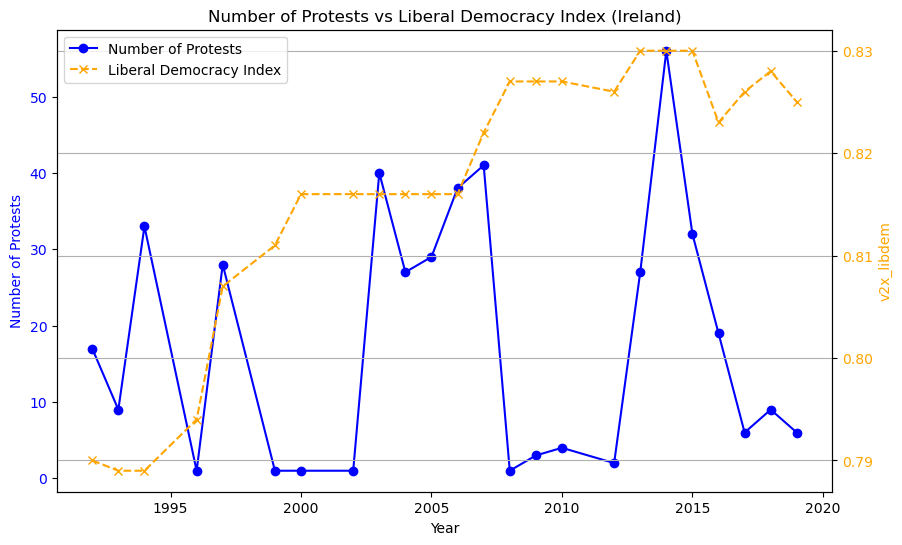

In [14]:
ireland_vdem = vdem_df[vdem_df['country_name'] == 'Ireland']

ireland_vdem = ireland_vdem[['year', 'v2x_libdem']]

# Merge datasets on 'year'
merged_df = pd.merge(protests_per_year_ie, ireland_vdem, on='year', how='inner')

# Plot the data
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot number of protests (primary y-axis)
ax1.plot(
    merged_df['year'],
    merged_df['num_protests'],
    color='blue',
    marker='o',
    label='Number of Protests'
)
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Protests', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for v2x_libdem
ax2 = ax1.twinx()
ax2.plot(
    merged_df['year'],
    merged_df['v2x_libdem'],
    color='orange',
    marker='x',
    linestyle='--',
    label='Liberal Democracy Index'
)
ax2.set_ylabel('v2x_libdem', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add title and grid
plt.title('Number of Protests vs Liberal Democracy Index (Ireland)')
plt.grid()

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Show plot
plt.show()




In [53]:
# Calculate correlation between num_protests and v2x_libdem
correlation = merged_df['num_protests'].corr(merged_df['v2x_libdem'])

print(f"Pearson correlation coefficient: {correlation:.2f}")



Pearson correlation coefficient: 0.05


Looking at the Pearson correlation coefficient, there is not a huge correlation between the number of protests and the Liberal Democracy Index; however, the year with the highest number of protests does align with the year with the highest liberal democracy index, perhaps suggesting that people felt empowered in that period to make change.

What to look at next:
- Correlation between number of protests per country and its average Freedom of Expression score. The narrow the scope, we'll look at just the top 20 most populous countries according to Worldometer (2025).

In [54]:
mostpopulous = ['United States', 'Canada', 'United Kingdom', 'France', 'Germany', 'Italy', 'Japan']

# Filter the datasets for G7 countries
protests_g7 = massmob_df[massmob_df['country'].isin(g7_countries)]
vdem_g7 = vdem_df[vdem_df['country_name'].isin(g7_countries)]


total_protests_g7 = protests_g7.groupby('country').size().reset_index(name='total_protests')
avg_freexp_g7 = vdem_g7.groupby('country_name')['v2x_freexp'].mean().reset_index(name='avg_freedom_of_expression')

# Standardize column names for merging
total_protests_g7.rename(columns={'country': 'country_name'}, inplace=True)

# Merge the two datasets
combined_g7 = pd.merge(total_protests_g7, avg_freexp_g7, on='country_name')

print(combined_g7)



     country_name  total_protests  avg_freedom_of_expression
0          Canada              52                   0.950233
1          France             542                   0.974100
2         Germany             362                   0.982833
3           Italy             166                   0.956900
4           Japan              59                   0.923067
5  United Kingdom             574                   0.935000


Now plot this...

Make changes to look at top 20 most populous countries instead of G7

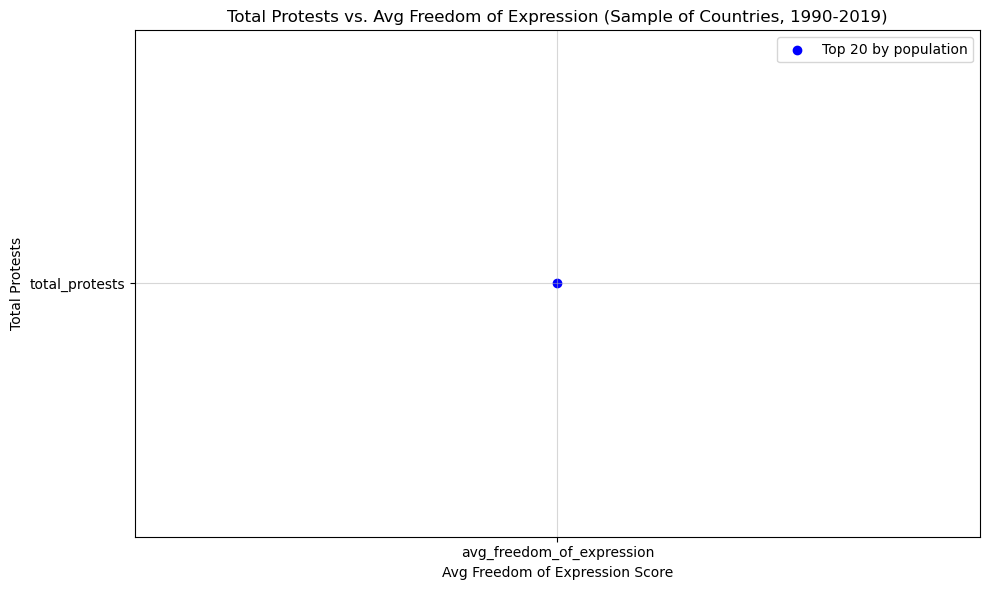

In [47]:
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(
    x='avg_freedom_of_expression',
    y='total_protests',  # Size of points
    color='blue',
    data=combined_toptwenty,
    label='Top 20 by population'
)

# Add country names as labels
for i, row in combined_toptwenty.iterrows():
    plt.text(
        row['avg_freedom_of_expression'], 
        row['total_protests'], 
        row['country_text_id'], 
        fontsize=9, 
        ha='right'
    )

# Titles and labels
plt.title('Total Protests vs. Avg Freedom of Expression (Sample of Countries, 1990-2019)')
plt.xlabel('Avg Freedom of Expression Score')
plt.ylabel('Total Protests')
plt.grid(alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

Use Numpy's polyfit for the line of best fit:

In [56]:
# Extract x and y values from combined_toptwenty
x = combined_toptwenty['avg_freedom_of_expression']
y = combined_toptwenty['total_protests']

# Fit a linear regression line using NumPy's polyfit
coefficients = np.polyfit(x, y, 1)  # Degree 1 for a straight line
line = np.poly1d(coefficients)

# Generate y values for the line of best fit
x_line = np.linspace(x.min(), x.max(), 100)
y_line = line(x_line)

# Plot the scatter plot and the line of best fit
plt.figure(figsize=(12, 8))
plt.scatter(x, y, color='blue', label='Data Points', s=50, alpha=0.7)
plt.plot(x_line, y_line, color='red', linestyle='--', label=f'Best Fit: y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}')

# Add country names as labels on the scatter plot
for i, row in combined_toptwenty.iterrows():
    plt.text(row['avg_freedom_of_expression'], row['total_protests'], row['country_name'], fontsize=8, ha='right', alpha=0.7)

# Titles, labels, and legend
plt.title('Total Protests vs. Avg Freedom of Expression (Top 20 Countries, 1990-2019)', fontsize=14)
plt.xlabel('Avg Freedom of Expression Score', fontsize=12)
plt.ylabel('Total Protests', fontsize=12)
plt.legend()
plt.grid(alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()

corr = x.corr(y)
print(f"Pearson correlation coefficient: {corr}")


KeyError: 'avg_freedom_of_expression'